In [85]:
import numpy as np
import random
import math
from numpy.linalg import norm, eig
#plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [92]:
def generate_data(size):
    A = np.zeros((size,size))
    x = np.zeros(size)
    for i in range(size):
        for j in range(size):
            A[i][j] = random.uniform(-100, 100)
        x[i] = random.uniform(-100, 100)
    b = A.dot(x)
    return A, b, x

def f(x):
    global A, b
    return norm(A.dot(x) - b) ** 2
    
def grad_f(x):
    global A, b
    return 2 * (A @ x - b).T @ A

def def_alpha():
    global A
    #собственные значения матрицы 2* A.T @ A
    eigenvalues, _ = eig(2 *A.T @ A)
    return max(eigenvalues)
    
def grad_descent(num_iter=100):
    global x
    f_solution = f(x)
    alpha, beta, eps = def_alpha(), 0.1, 0.001
    H = ((1 - beta) ** 2) / (alpha * (1 + beta) ** 2)
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(100)
    steps = [[cur_x, f(cur_x)]]
    # итерация цикла -- шаг градиентнго спуска
    while  f(cur_x) - f_solution > eps:
        steps.append([cur_x, f(cur_x)])
        cur_x = cur_x - H * grad_f(cur_x)
    return np.array(steps)

A,b,x = generate_data(100)
steps = grad_descent()
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %d'%steps[-1][1])

x_solution =  [ -0.38533198  81.83220259  45.83778009 -14.22445606  45.88131252
  36.5023666  -25.77407853  -1.45259447 -84.52255195 -14.8513988
 -75.64893905 -83.14155973  36.74083816  40.5124644  -36.13055019
  32.91179709  85.11109789 -84.55855395 -41.45804891 -17.67978839
  34.42932665  31.96149456 -29.3722845   46.27296017  25.37870397
 -11.56421645 -62.26523952 -22.11083282 -52.87159318 -30.53266395
   7.76065117 -26.32476604  76.01147314  15.11460356  90.22987275
  72.26991389  80.96440937  17.60432481 -65.53308809 -15.2614835
 -86.60590124 -74.68931354  47.20526365 -83.66675098  18.95105775
  31.40789907  44.86719015 -63.72092411 -25.94516591  24.80049025
  13.81159272 -98.95375834  92.54045087 -36.31385349  43.55991748
  -4.95131496  69.87678588  71.91773526  40.92006066  76.80978649
  90.97915319 -90.82444821 -98.80117785  78.5429705   65.47631437
  -6.78958661 -75.77164166 -66.33770767  36.4763533   66.00198158
  79.4137423  -14.14273557 -77.66235024 -32.13718255  77.3769691

In [93]:
print('count of steps = %d'%steps.shape[0])

count of steps = 261652


In [94]:
file = open('solution.txt', 'w')
file.write('step \t function value \n')
for i,step in enumerate(steps):
    file.write('%d \t %f \n'%(i, step[1]))

Text(0,0.5,'f(cur_x)')

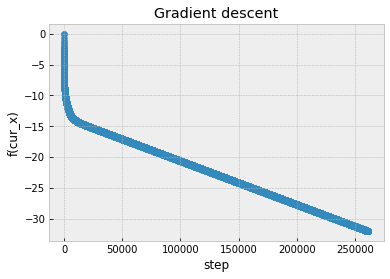

In [96]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution)) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')